In [1]:
# C:\Users\yebel\Desktop\OPENCLASSROOMS\FORMATION_DATA_ANALYST\OPENCLASSROOMS_COURS\PROJET10
# PROJET10_DATA_ANALYSIS_OCR
# Changement du repertoire: A ne plus changer.
import os
os.chdir('C://Users//yebel//Desktop//OPENCLASSROOMS//FORMATION_DATA_ANALYST//OPENCLASSROOMS_COURS//PROJET10')

In [2]:
# 0- IMPORTATIONS DES LIBRAIRIES NECESSAIRES POUR L'ANALYSE DES DONNEES.

import pandas as pd
import numpy as np
%matplotlib inline
import matplotlib.pyplot as plt
import datetime 
import scipy.stats as st
import seaborn as sns 
import matplotlib.patches as mpatches
from pandas_profiling import ProfileReport

from sklearn import metrics
from sklearn import preprocessing
from sklearn import decomposition
from sklearn.preprocessing import StandardScaler
from sklearn.cluster import KMeans
from sklearn.decomposition import PCA
from scipy.stats import t, shapiro
from statsmodels.stats.outliers_influence import variance_inflation_factor
from sklearn.metrics import classification_report
from sklearn.model_selection import train_test_split
from sklearn.model_selection import cross_val_score
from sklearn.linear_model import LogisticRegression
from sklearn.metrics import accuracy_score
from sklearn.linear_model import LogisticRegressionCV
from sklearn.model_selection import KFold
from sklearn.model_selection import StratifiedKFold
from sklearn.model_selection import ShuffleSplit
from sklearn.ensemble import RandomForestClassifier
from sklearn.model_selection import LeaveOneOut


from joblib import dump, load

import warnings
warnings.filterwarnings('ignore')
warnings.warn('DelftStack')
warnings.warn('Do not show this message')
import plotly.express as px
from statsmodels.tools import add_constant
from statsmodels.api import Logit
import statsmodels.api as sm
import statsmodels.formula.api as smf


import sf_stats_inferentielles as sfsi
import sf_classification_acp as sfca
import sf_graphiques as sfg
import sf_modeles_regression as sfmr
import sf_modeles_classif_supervisee as sfmcs

%pylab inline

Populating the interactive namespace from numpy and matplotlib


In [3]:
#Paramètres de style
plt.style.use('ggplot') 
plt.rcParams.update({'font.size': 12, 'axes.labelsize': 16, 'axes.titlesize': 24})

In [4]:
# IMPORTATION  DES DONNEES.

#1-Training set.

Billets_df_new = pd.read_csv("DATA/dataf.csv", sep = ';',)             

Billets_df_new = Billets_df_new[["is_genuine","diagonal","height_left","height_right","margin_low","margin_up","length"]]

In [5]:
# Convertir la variable binaire texte en variable binaire entière.

Billets_df_new[['is_genuine']]=Billets_df_new[['is_genuine']].astype('int')

In [6]:
# visualisation de Billet_df: 6 variables quantitatives et une variable binaire.

Billets_df_new

,is_genuine,diagonal,height_left,height_right,margin_low,margin_up,length
0,1,171.81,104.86,104.95,4.52,2.89,112.83
1,1,171.46,103.36,103.66,3.77,2.99,113.09
2,1,172.69,104.48,103.50,4.40,2.94,113.16
3,1,171.36,103.91,103.94,3.62,3.01,113.51
4,1,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...,...
1495,0,171.75,104.38,104.17,4.42,3.09,111.28
1496,0,172.19,104.63,104.44,5.27,3.37,110.97
1497,0,171.80,104.01,104.12,5.51,3.36,111.95
1498,0,172.06,104.28,104.06,5.17,3.46,112.25


# Regression Logistique

In [7]:
# Données sources de training et testing dataset.

X = Billets_df_new.iloc[:,1:].copy()

# Visualisation de X.

X

,diagonal,height_left,height_right,margin_low,margin_up,length
0,171.81,104.86,104.95,4.52,2.89,112.83
1,171.46,103.36,103.66,3.77,2.99,113.09
2,172.69,104.48,103.50,4.40,2.94,113.16
3,171.36,103.91,103.94,3.62,3.01,113.51
4,171.73,104.28,103.46,4.04,3.48,112.54
...,...,...,...,...,...,...
1495,171.75,104.38,104.17,4.42,3.09,111.28
1496,172.19,104.63,104.44,5.27,3.37,110.97
1497,171.80,104.01,104.12,5.51,3.36,111.95
1498,172.06,104.28,104.06,5.17,3.46,112.25


In [8]:
# Target dataset: Variable Objectif.

y = Billets_df_new.iloc[:,0]

# Visualisation de y.

y

0       1
1       1
2       1
3       1
4       1
       ..
1495    0
1496    0
1497    0
1498    0
1499    0
Name: is_genuine, Length: 1500, dtype: int32

In [9]:
# Répartition du jeu de données entre training dataset et testing dataset.

X_train, X_test, y_train, y_test = train_test_split(X,y,train_size=0.7, random_state=2)

In [10]:
# Visualisation des dimensions des datasets générées.

X_train.shape, X_test.shape, y_train.shape, y_test.shape 

((1050, 6), (450, 6), (1050,), (450,))

La régression logistique peut être faite de plusieurs facon: Nous utiliserons ici deux méthodes pour faire apparaître les qualités de chacune, ainsi que leurs lacunes respectives: 
1 modèle avec la Statsmodels librairies, pour ses qualités en inférence statistique.
1 modèle avec Scikit-learn librairie pour ses qualités prédictives précises.
Nous opposerons ces deux méthodes, aux méthodes Cross-validation, afin de choisir le modèle le plus performant en termes de précision. 

## Régression logistique, sklearn.linear_model.LogisticRegression()¶

In [11]:
# Modélisation avec le Training dataset.

# Définition du modèle.

model1_reg_log_sklearn = LogisticRegression()

# Estimation du modèle.

model1_reg_log_sklearn.fit(X_train, y_train)

# Visualisation des coefficients estimés du modèle.

print(model1_reg_log_sklearn.intercept_)

print(model1_reg_log_sklearn.coef_)

[-0.03233692]
[[-0.15389527 -1.36027619 -1.93461139 -3.43790578 -2.98684432  3.50964382]]


In [12]:
# Prédiction du target du modèle avec le Testing dataset.

y_pre_log_sklearn = model1_reg_log_sklearn.predict(X_test)

# Probabilité du modèle de prédiction.

model1_reg_log_sklearn.predict_proba(X_test)

array([[7.14473410e-04, 9.99285527e-01],
       [9.99734093e-01, 2.65907381e-04],
       [9.99690268e-01, 3.09732279e-04],
       [5.81401133e-03, 9.94185989e-01],
       [1.91775765e-02, 9.80822424e-01],
       [2.06648247e-03, 9.97933518e-01],
       [9.97730327e-01, 2.26967268e-03],
       [9.18677948e-05, 9.99908132e-01],
       [2.19515884e-04, 9.99780484e-01],
       [9.87046258e-01, 1.29537418e-02],
       [9.94869048e-01, 5.13095167e-03],
       [8.21407857e-03, 9.91785921e-01],
       [9.31685369e-01, 6.83146313e-02],
       [3.28238432e-02, 9.67176157e-01],
       [7.78298411e-03, 9.92217016e-01],
       [5.71736462e-04, 9.99428264e-01],
       [9.98238210e-01, 1.76179016e-03],
       [2.78851238e-01, 7.21148762e-01],
       [9.99408112e-01, 5.91887868e-04],
       [2.63415810e-02, 9.73658419e-01],
       [6.79005069e-02, 9.32099493e-01],
       [9.97304811e-01, 2.69518886e-03],
       [2.88403552e-02, 9.71159645e-01],
       [9.28640618e-01, 7.13593823e-02],
       [9.996761

In [13]:
# Evaluation du modèle:2ere Façon.Voir:PROJET10/Detection-faux-billets-main/Detection-faux-billets-main/Detection_faux_billets.ipynb.

probabilites = model1_reg_log_sklearn.predict_proba(X)

In [14]:
# Prédiction du modèle avec la dataset global:Billets_df_new.

Billets_df_new['prediction']=model1_reg_log_sklearn.predict(X)

In [15]:
# Déterminons la performance du modèle de prédiction.

model_acc = accuracy_score(Billets_df_new['is_genuine'],Billets_df_new['prediction'])

# Visualisation de la performance du modèle.

model_acc

0.9913333333333333

In [16]:
# Déterminons et comparons les résultats issus des datasets training et testing.

print('Train_score', model1_reg_log_sklearn.score(X_train,y_train))
print('Test_score', model1_reg_log_sklearn.score(X_test,y_test))

Train_score 0.9885714285714285
Test_score 0.9977777777777778


In [17]:
# Matrice de confusion pour la dataset dans son ensemble.

conf_mat = pd.crosstab(Billets_df_new['is_genuine'],Billets_df_new['prediction'])

# Visualisation de la matrice de confusion globale.

conf_mat

prediction,0,1
is_genuine,,
0,491,9
1,4,996


In [18]:
# Fonction qui définit la matrice de confusion de l'ensemble de la dataset.

def confusion_matrix(df):
    sns.heatmap(df, center=0, cmap='RdBu', 
                linewidths=1, annot=True, fmt=".0f", vmin=0, vmax=600)
    plt.title('Matrice de confusion', fontsize = 15, fontweight='bold')
    plt.show()

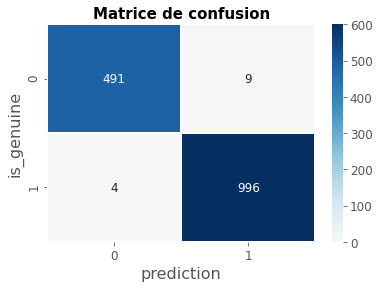

In [19]:
# Matrix de confusion avec l'ensemble des données du modèle.

confusion_matrix(conf_mat)

In [20]:
# Analye des composantes de la matrice de confusion du modèle.

vrai_negatif = conf_mat.loc[0,0]
faux_positif = conf_mat.loc[0,1]
faux_negatif = conf_mat.loc[1,0]
vrai_positif = conf_mat.loc[1,1]

# Déterminons le taux d'erreurs du modèle.

taux_erreur = (faux_positif + faux_negatif) / (vrai_negatif+faux_positif+faux_negatif+vrai_positif)

# Visualisation du taux d'erreurs.

taux_erreur

0.008666666666666666

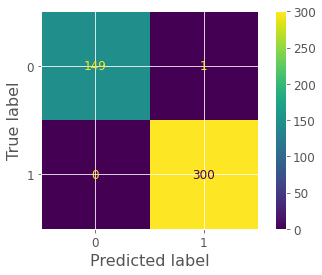

In [21]:
metrics.plot_confusion_matrix(model1_reg_log_sklearn,X_test,y_test)

In [22]:
# Test de classification du modèle.

print(classification_report(y_test,y_pre_log_sklearn))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       1.00      1.00      1.00       300

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



## Régression logistique avec la Cross-Validation

In [23]:
# Modélisation avec le Training dataset.

model1_reg_log_sklearn_CV = LogisticRegressionCV()

# Estimation du modèle.
model1_reg_log_sklearn_CV.fit(X_train, y_train)

# Visualisation des coefficients estimés du modèle.

print(model1_reg_log_sklearn_CV.intercept_)

print(model1_reg_log_sklearn_CV.coef_)

[-0.10318037]
[[-0.24567904 -1.4816888  -2.63229715 -5.27347514 -8.11490764  4.62634261]]


In [24]:
# Prédiction du target du modèle avec le Testing dataset.

y_pre_log_sklearn_CV = model1_reg_log_sklearn_CV.predict(X_test)

# Probabilité du modèle de prédiction.

model1_reg_log_sklearn_CV.predict_proba(X_test)

array([[4.50673213e-05, 9.99954933e-01],
       [9.99997166e-01, 2.83381404e-06],
       [9.99991763e-01, 8.23697089e-06],
       [3.49626218e-04, 9.99650374e-01],
       [8.28351291e-03, 9.91716487e-01],
       [8.12204390e-05, 9.99918780e-01],
       [9.99657377e-01, 3.42623314e-04],
       [1.20570681e-06, 9.99998794e-01],
       [3.31712834e-06, 9.99996683e-01],
       [9.98188033e-01, 1.81196656e-03],
       [9.98944262e-01, 1.05573781e-03],
       [6.79128708e-04, 9.99320871e-01],
       [9.94767840e-01, 5.23216009e-03],
       [3.67930082e-03, 9.96320699e-01],
       [1.26116206e-03, 9.98738838e-01],
       [1.81309746e-05, 9.99981869e-01],
       [9.99921957e-01, 7.80432566e-05],
       [4.83696706e-01, 5.16303294e-01],
       [9.99996321e-01, 3.67889463e-06],
       [5.19113704e-03, 9.94808863e-01],
       [2.00585814e-02, 9.79941419e-01],
       [9.99877919e-01, 1.22081154e-04],
       [4.61047846e-03, 9.95389522e-01],
       [9.86482711e-01, 1.35172893e-02],
       [9.999945

In [25]:
# Evaluation du modèle_CV:2ere Façon.Voir:PROJET10/Detection-faux-billets-main/Detection-faux-billets-main/Detection_faux_billets.ipynb.

probabilites = model1_reg_log_sklearn_CV.predict_proba(X)

In [26]:
# Prédiction du modèle avec la dataset globale:Billets_df_new

Billets_df_new['prediction']=model1_reg_log_sklearn_CV.predict(X)

In [27]:
# Déterminons la performance du modèle de prédiction.

model_acc_CV = accuracy_score(Billets_df_new['is_genuine'],Billets_df_new['prediction'])

# Visualisation de la performance du modèle.

model_acc_CV

0.992

In [28]:
# Déterminons et comparons les résultats issus des datasets training et testing.

print('Train_score', model1_reg_log_sklearn_CV.score(X_train,y_train))

print('Test_score', model1_reg_log_sklearn_CV.score(X_test,y_test))

Train_score 0.9895238095238095
Test_score 0.9977777777777778


In [29]:
# Matrice de confusion pour la dataset dans son ensemble.

conf_mat_CV = pd.crosstab(Billets_df_new['is_genuine'],Billets_df_new['prediction'])

conf_mat_CV

prediction,0,1
is_genuine,,
0,491,9
1,3,997


In [30]:
def confusion_matrix(df):
    sns.heatmap(df, center=0, cmap='RdBu', 
                linewidths=1, annot=True, fmt=".0f", vmin=0, vmax=600)
    plt.title('Matrice de confusion', fontsize = 15, fontweight='bold')
    plt.show()
    

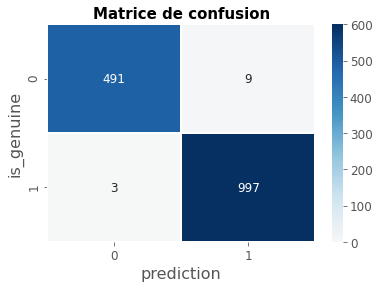

In [31]:
# Matrix de confusion avec l'ensemble des données du modèle.

confusion_matrix(conf_mat_CV)

In [32]:
# Analye des composantes de la matrice de confusion du modèle.

vrai_negatif_CV = conf_mat_CV.loc[0,0]
faux_positif_CV = conf_mat_CV.loc[0,1]
faux_negatif_CV = conf_mat_CV.loc[1,0]
vrai_positif_CV = conf_mat_CV.loc[1,1]

# Déterminons le taux d'erreurs du modèle.

taux_erreur_CV = (faux_positif_CV + faux_negatif_CV) / (vrai_negatif_CV+faux_positif_CV+faux_negatif_CV+vrai_positif_CV)

# Visualisation du taux d'erreurs.

taux_erreur_CV

0.008

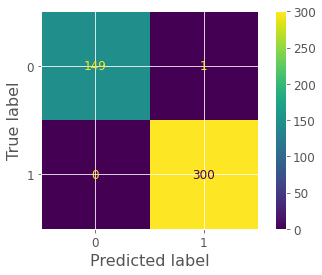

In [33]:
metrics.plot_confusion_matrix(model1_reg_log_sklearn_CV,X_test,y_test)

In [34]:
# Test de classification du modèle.

print(classification_report(y_test,y_pre_log_sklearn_CV))

              precision    recall  f1-score   support

           0       1.00      0.99      1.00       150
           1       1.00      1.00      1.00       300

    accuracy                           1.00       450
   macro avg       1.00      1.00      1.00       450
weighted avg       1.00      1.00      1.00       450



## Régression logistique, statsmodels.api.Logit()

In [35]:
# Définition et Estimation du modèle.

model2_reg_log_sm = sm.Logit(y_train, sm.add_constant(X_train)).fit()

# Visualisation du modèle.

print(model2_reg_log_sm.summary())

Optimization terminated successfully.
         Current function value: 0.032259
         Iterations 13
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1050
Model:                          Logit   Df Residuals:                     1043
Method:                           MLE   Df Model:                            6
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.9493
Time:                        12:01:25   Log-Likelihood:                -33.872
converged:                       True   LL-Null:                       -668.34
Covariance Type:            nonrobust   LLR p-value:                5.742e-271
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -221.9023    275.400     -0.806      0.420    -761.677     317.872
diagonal         0.463

Par défaut, l'algorithme de Newton-Raphson a été utilisé.

La log-vraisemblance du modèle a été maximisée après 13 itérations;

Les variables explicatives semblent prédir à la perfection le modèle. Ce qui est surréaliste des
intérrogations. D'où l'alerte lancée en termes d'avertissement. Ceci peut trouver une explication du fait que les données utilisées seraient plutôt artificielles que réelles.

Au seuil de 5%, les diagonal,height_left sont non significatives.Nous devons donc recommencer la régression sans variables significatives au seuil de 5%.

In [36]:
# Définition et Estimation du modèle.

model2_reg_log_sm = sm.Logit(y_train, sm.add_constant(X_train[['height_right', 'margin_low', 'margin_up', 'length']])).fit()

# Visualisation du modèle.

print(model2_reg_log_sm.summary())

Optimization terminated successfully.
         Current function value: 0.032752
         Iterations 12
                           Logit Regression Results                           
Dep. Variable:             is_genuine   No. Observations:                 1050
Model:                          Logit   Df Residuals:                     1045
Method:                           MLE   Df Model:                            4
Date:                Mon, 09 May 2022   Pseudo R-squ.:                  0.9485
Time:                        12:01:29   Log-Likelihood:                -34.390
converged:                       True   LL-Null:                       -668.34
Covariance Type:            nonrobust   LLR p-value:                3.033e-273
                   coef    std err          z      P>|z|      [0.025      0.975]
--------------------------------------------------------------------------------
const         -239.2644    148.090     -1.616      0.106    -529.515      50.986
height_right    -2.836

In [37]:
# prédiction

X_test_log_sm = X_test.copy()

X_test_with_constant = sm.add_constant(X_test[['height_right', 'margin_low', 'margin_up', 'length']])

y_pre_reg_log_sm = model2_reg_log_sm.predict(X_test_with_constant)

X_test_log_sm['predicted_prob'] = y_pre_reg_log_sm  

X_test_log_sm['predicted'] =True
                                             
X_test_log_sm.loc[X_test_log_sm['predicted_prob']<=0.5, 'predicted'] = False

1. La précision de la régression logistique : 99.56%
2. Billets mal identifiés :


,diagonal,height_left,height_right,margin_low,margin_up,length,predicted_prob,predicted
1025,172.17,104.20,104.13,3.86,3.38,112.44,0.859881,True
1383,171.75,104.16,104.16,4.23,2.99,111.83,0.526707,True


3. Matrice de confusion, régression logistique :


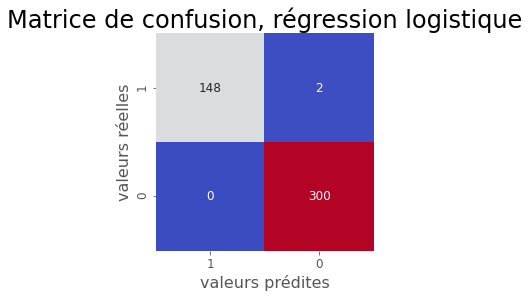

4. Rapport de classification, régression logistique :
              precision    recall  f1-score   support

           0       1.00      0.99      0.99       150
           1       0.99      1.00      1.00       300

    accuracy                           1.00       450
   macro avg       1.00      0.99      0.99       450
weighted avg       1.00      1.00      1.00       450



In [38]:
# Evaluation du modèle.

# Déterminons la performance du modèle.

accuracy_log_sm = "{:.2%}".format(round(metrics.accuracy_score(X_test_log_sm['predicted'], y_test),4))

# Visualisation de performance du modèle.

print(f'1. La précision de la régression logistique : {accuracy_log_sm}')

print('2. Billets mal identifiés :')

display(X_test_log_sm[y_test != X_test_log_sm['predicted']])

print('3. Matrice de confusion, régression logistique :')

conf_log_sm = metrics.confusion_matrix(y_test, X_test_log_sm['predicted'])
sns.heatmap(conf_log_sm, square=True, annot=True, cbar=False, xticklabels=list(y_test.unique()), yticklabels=list(y_test.unique()), cmap='coolwarm', fmt='g')
plt.xlabel('valeurs prédites')
plt.ylabel('valeurs réelles')
plt.title('Matrice de confusion, régression logistique')
plt.show()

print('4. Rapport de classification, régression logistique :')
print(metrics.classification_report(y_test, X_test_log_sm['predicted']))

In [39]:
# CROSS-VALIDATION MODELES.

Y  = y
# 1-REGRESSION LOGISTIQUE AVEC KFOLD CROSS-VALIDATION.

logreg=LogisticRegression()
kf=KFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=kf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.99666667 0.99666667 0.99       0.97       0.97666667]
Average Cross Validation score :0.986


In [40]:
# 2-REGRESSION LOGISTIQUE AVEC StratifiedKFold CROSS-VALIDATION.

logreg=LogisticRegression()
stratifiedkf=StratifiedKFold(n_splits=5)
score=cross_val_score(logreg,X,Y,cv=stratifiedkf)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [0.98666667 0.98666667 0.99666667 0.98666667 0.99333333]
Average Cross Validation score :0.99


In [41]:
# 3-RandomForestClassifier AVEC LeaveOneOut CROSS-VALIDATION.

loo=LeaveOneOut()
tree=RandomForestClassifier(n_estimators=10,max_depth=5,n_jobs=-1)
score=cross_val_score(tree,X,Y,cv=loo)
print("Cross Validation Scores are {}".format(score))
print("Average Cross Validation score :{}".format(score.mean()))

Cross Validation Scores are [1. 1. 1. ... 1. 1. 1.]
Average Cross Validation score :0.9866666666666667


In [42]:
# 4-REGRESSION LOGISTIQUE AVEC Monte Carlo Cross-Validation (Shuffle Split)

logreg=LogisticRegression()
shuffle_split=ShuffleSplit(test_size=0.3,train_size=0.5,n_splits=10)

# Déterminons les résultats du modèle.

scores=cross_val_score(logreg,X,Y,cv=shuffle_split)

# Visualisation des résultats du modèle.

print("cross Validation scores:n {}".format(scores))
print("Average Cross Validation score :{}".format(scores.mean()))

cross Validation scores:n [0.98888889 0.98666667 0.99333333 0.99111111 0.99777778 0.98666667
 0.98666667 0.98888889 0.99555556 0.99777778]
Average Cross Validation score :0.9913333333333332


Compte tenu des résultats des 3 précédents modèles testés, auquels nous avons testés 5 autres modèles de la Cross-Validation, il apparait que le modèle de régression logistique intégrant la cross-validation (deuxième modèle) comprend les meilleurs résultats.

Ce modèle sera utilisé pour tester les futurs billets.

Pour ce faire, il convient d'enregistrer le modèle entrainé grâce à la librairie joblib.

## Enregistrement du modèle de régression logistique entrainé.

In [43]:
from joblib import dump, load
dump(model1_reg_log_sklearn_CV, "Logistic_Trained_model.joblib")

['Logistic_Trained_model.joblib']